# 18.S190/6.S090 Problem Set 2 Solutions

## Problem 1 (2+2+2+3+2+2+2 points)

Consider a linear least-square fitting (regression) problem in which your input data $x$ lies within the narrow domain $[100000, 100001]$. You want to fit a model of the form:

$$
y \approx \beta_0 + \beta_1 x.
$$

You can represent this model in two different bases:
1. The **standard monomial basis**: $\{1, x\}$,
2. A **shifted basis**: $\{1, x - 100000.5\}$.

For $N$ data points $\{(x_i, y_i)\}_{i=1}^N$, the mean squared error (MSE) loss function for both is written as:

$$
L(\beta_0, \beta_1) = \frac{1}{N} \sum_{i=1}^N \bigl(\beta_0 + \beta_1 x_i - y_i\bigr)^2,
$$

and

$$
\tilde{L}(\tilde{\beta}_0, \tilde{\beta}_1) = \frac{1}{N} \sum_{i=1}^N \Bigl(\tilde{\beta}_0 + \tilde{\beta}_1 (x_i - 100000.5) - y_i\Bigr)^2.
$$

### Tasks (hand calculations)

1. Write the two loss functions as $L = \frac{1}{N} \Vert  A\beta - y \Vert ^2$ and $\tilde{L} = \frac{1}{N} \Vert  \tilde{A}\tilde{\beta} - y \Vert ^2$, respectively.  What are the matrices $A$ and $\tilde{A}$?

2. Give a formula writing $\tilde{A}$ as some matrix $B$ times $A$ (on the left or right?).  Denote the least-squares solutions (optimal $\beta$) by $\beta_*$ and $\tilde{\beta}_*$, respectively (e.g. $\beta_*$ satisfies the normal equations $A^T A \beta_* = A^T y$, from class).  Give a formula relating $\beta_*$ and $\tilde{\beta}_*$ in terms of your matrix $B$.

3. Write the gradients $\nabla_\beta L$ and $\nabla_{\tilde{\beta}} \tilde{L}$ of the two loss functions, in terms of the matrices and vectors from the previous part.


## Solutions

**(1)** We have 

$$
A = 
\begin{pmatrix}
1 & x_1 \\
\vdots & \vdots \\
1 & x_N
\end{pmatrix}
\quad \text{and} \quad
\tilde{A} =
\begin{pmatrix}
1 & x_1 - 100000.5 \\
\vdots & \vdots \\
1 & x_N - 100000.5
\end{pmatrix}
$$

**(2)** Since the columns of $\tilde{A}$ are a linear combination of the columns of $A$, they must correspond to multiplying $A$ on the *right* by a $2\times 2$ matrix $B$.  In particular: 

$$
B =
\begin{pmatrix}
1 & -100000.5 \\
0 & 1
\end{pmatrix}
$$

satisfies $AB = \tilde{A}$. We have $\beta_* = B \tilde{\beta}_*$, since this means 

$$
\beta_0 = \tilde{\beta}_0 - 10000.5 \tilde{\beta}_1, \quad \beta_1 = \tilde{\beta}_1.
$$

Furthermore, we can easily see that the normal equations are equivalent:

$$
B^T A^T A B \tilde{\beta} = B^T A^T y \quad \implies \quad \cancel{B^T} A^T A \beta = \cancel{B^T} A^T y.
$$

(and vice versa, since $B$ is invertible).

**(3)** We have 

$$
\nabla_{\beta} L = \frac{2 A^T}{N} (A \beta - y)
\quad \text{and} \quad 
\nabla_{\tilde{\beta}} \tilde{L} = \frac{2 \tilde{A}^T}{N} (\tilde{A} \tilde{\beta} - y).
$$


### Tasks (computer)

Generate some random data from a "true" model $y(x) = 1 + 10x$ plus noise, in Julia or Python, from 200 equally spaced points $x$:

In [2]:
# Python
import numpy as np
x = np.linspace(100000, 100001, 200)
y = 1 + 10*x + 0.1 * np.random.randn(len(x))

4. Construct your matrices $A$ and $\tilde{A}$, and compute the least-squares solutions $\beta_*$ and $\tilde{\beta}_*$, using `β_star = A \ y` in Julia or `β_star = numpy.linalg.lstsq(A, y)` in Python, and similarly for $\tilde{A}$.  Check that $\beta_*$ and $\tilde{\beta}_*$ are related by your matrix $B$ as predicted above (up to many digits, i.e. up to roundoff errors).  Plot the two fits (as lines) along with the data (as dots) to make sure they looks okay.  (The two lines should look identical. Why?)

5.  Suppose we take a single gradient-descent step $\beta_1 = \beta_0 - s\left.\nabla L\right|_{\beta_0}$ starting at a "guess" $\beta_0 = [0, 0]$, with a learning rate $s$, and similarly for $\tilde{L}$.   If you set $s = 10^{-7}$ in both $L$ and $\tilde{L}$, how much do the two loss functions decrease by, and how much does the error $\Vert  \beta_k - \beta_* \Vert $ (or $\Vert  \tilde{\beta}_k - \tilde{\beta}_* \Vert $) decrease by?

6. Another way to characterize gradient descent is how well the "downhill" direction $-\nabla L$ points towards the optimum $\beta_*$.  Compute the *angle* (via the [dot product formula](https://en.wikipedia.org/wiki/Dot_product#Geometric_definition)) between $\left. -\nabla L \right|_{\beta_0}$ and $\beta_* - \beta_0$, and similarly between $\left. -\nabla \tilde{L} \right|_{\tilde{\beta}_0}$ and $\tilde{\beta}_* - \tilde{\beta}_0$.  Which one points more directly at the optimum?   Is this consistent with your observations from the previous part?

7. Compute the condition numbers of the two matrices via `cond(A)` in Julia (do `using LinearAlgebra` first) or `numpy.linalg.cond(A)` in Python.   It turns out to be quite a general result that badly conditioned matrices lead to slow convergence in gradient descent (as well as exacerbating roundoff errors).

### Solutions:

**1.4**

Here is code to construct the matrices, solve the least-square problems, and plot the solutions in Python:

Beta val: [-810.23951042   10.00811238]
Beta val computed from beta_tilde: [-810.23951098   10.00811238]


/var/folders/q9/2vfl1wt51558xwpl4nv4wt580000gn/T/ipykernel_68164/2979468885.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta_star = np.linalg.lstsq(A,y)[0]
/var/folders/q9/2vfl1wt51558xwpl4nv4wt580000gn/T/ipykernel_68164/2979468885.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta_star1 = np.linalg.lstsq(A1,y)[0]


Text(0, 0.5, 'y')

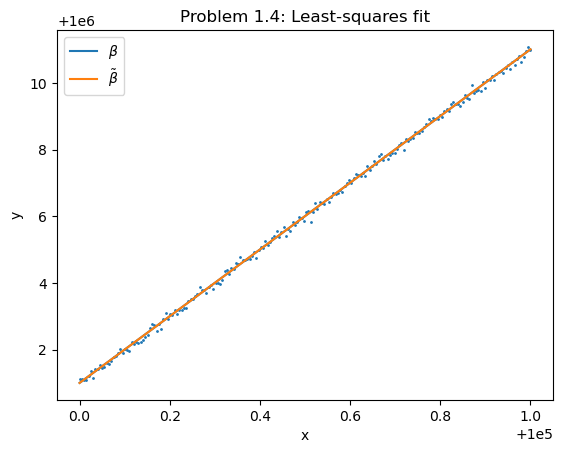

In [3]:
import matplotlib.pyplot as plt

# 1.4
A = np.array([[1,x_val] for x_val in x])
A1 = np.array([[1, x_val - 100000.5] for x_val in x])
beta_star = np.linalg.lstsq(A,y)[0]
beta_star1 = np.linalg.lstsq(A1,y)[0]
print("Beta val:", beta_star)
print("Beta val computed from beta_tilde:", np.array([[1,-100000.5],[0, 1]]) @beta_star1)
plt.plot(x, beta_star[0] + beta_star[1]*x, label="Beta")
plt.plot(x, beta_star1[0] + beta_star1[1]*(x-100000.5), label="Beta_tilde")
plt.scatter(x, y, s = 1)
plt.legend(["$\\beta$", "$\\tilde{\\beta}$"])
plt.title("Problem 1.4: Least-squares fit")
plt.xlabel("x")
plt.ylabel("y")

As expected, the two fitted lines fall on top of one another and go through the data — in both cases we are finding the same best-fit line, just in a different basis.  Notice that it gets the slope $\approx 10$ about right, but there is a big error in the intercept (since that involves extrapolating to $x=0$ from $x \approx 100000$, so a tiny error in the slope will cause a big error in the intercept).

We can also check the expected relationship $\beta = B \tilde{\beta}$, by computing the relative $\Vert  \beta - B \tilde{\beta} \Vert  / \Vert  \beta \Vert $:

In [4]:
B = np.array([[1, -100000.5], [0, 1]])
np.linalg.norm(beta_star - B @ beta_star1) / np.linalg.norm(beta_star)

7.013252863457614e-10

which is pretty small $\approx 2.5 \times 10^{-10}$, though not near machine precision — our accuracy has suffered since $A$ is ill-conditioned:

In [5]:
np.linalg.cond(A)

34468586613.31661

**1.5**

Now, let's try the gradient-descent steps:

In [6]:
# 1.5
s = 1e-7
N = 200
beta0 = np.array([0,0])
beta1 = np.array([0,0])
nabla_L = 2 * A.T @ (A @ beta0 - y)/N
nabla_L1 = 2 * A1.T @ (A1 @ beta1 - y)/N
new_beta0 = beta0 - s * nabla_L
new_beta1 = beta1 - s * nabla_L1
print("Change in Loss (L and tilde(L)):", np.mean((A @ new_beta0 - y)**2)-np.mean((A @ beta0 - y)**2), np.mean((A1 @ new_beta1 - y)**2)-np.mean((A1 @ beta1 - y)**2))
print("Change in Error (L and tilde(L)):", np.linalg.norm(new_beta0 -beta_star)-np.linalg.norm(beta0 - beta_star),
np.linalg.norm(new_beta1 - beta_star1)-np.linalg.norm(beta1 - beta_star1))

Change in Loss (L and tilde(L)): 3.996127931018512e+18 -400004.7614746094
Change in Error (L and tilde(L)): 19196.332211215744 -0.20000120042823255


For $L$, even a step $s = 10^{-7}$ is too big!  The loss $L$ actually *increases* by $\approx 4 \times 10^{18}$, and the $\beta$ gets *farther* from $\beta_*$ (both changes are positive = increases).

In contrast, for $\tilde{L}$, the loss $\tilde{L}$ is s decreasing by $\approx 4 \times 10^5$ and the distance from $\tilde{\beta}_*$ decreases (by $\approx 0.2$).

To get a decreasing loss for $L$, we'd need to use a much smaller step, e.g. $s = 10^{-11}$:

In [7]:
s = 1e-11
N = 200
beta0 = np.array([0,0])
beta1 = np.array([0,0])
nabla_L = 2 * A.T @ (A @ beta0 - y)/N
nabla_L1 = 2 * A1.T @ (A1 @ beta1 - y)/N
new_beta0 = beta0 - s * nabla_L
new_beta1 = beta1 - s * nabla_L1
print("Change in Loss (L and tilde(L)):", np.mean((A @ new_beta0 - y)**2)-np.mean((A @ beta0 - y)**2), np.mean((A1 @ new_beta1 - y)**2)-np.mean((A1 @ beta1 - y)**2))
print("Change in Error (L and tilde(L)):", np.linalg.norm(new_beta0 -beta_star)-np.linalg.norm(beta0 - beta_star),
np.linalg.norm(new_beta1 - beta_star1)-np.linalg.norm(beta1 - beta_star1))

Change in Loss (L and tilde(L)): -360007521571.8666 -40.0006103515625
Change in Error (L and tilde(L)): -0.022214505157876374 -2.0000035874545574e-05


which *is* an in improvement (the distance from $\beta_*$ decreases), but much smaller.

**1.6** Now, let's compute the angles between $\nabla L$ and $\beta_* - \beta$ for both $L$ and $\tilde{L}$.

The result is that $\nabla L$ is ≈ 89.7° from the correct direction: *almost perpendicular* to the correct direction.   So it's not surprising that we have to take such small steps to avoid making things worse!

In contrast, $\nabla \tilde{L}$ is ≈ 0.0005° from the correct angle: it is pointing almost directly towards the minimum, which is why we can take larger steps.

In [8]:
def included_angle(v1, v2):
    numerator = np.dot(v1, v2)
    denominator = np.linalg.norm(v1) * np.linalg.norm(v2)
    # convert to degrees
    return np.arccos(numerator / denominator) * (180 / np.pi)


# 1.6
print("Angle (degrees) Between -nabla (L) and beta_star - beta0:",included_angle(-nabla_L, beta_star - beta0))
print("Angle (degrees) Between -nabla (tilde(L)) and tilde(beta_star) - beta0:", included_angle(-nabla_L1, beta_star1 - beta1))

Angle (degrees) Between -nabla (L) and beta_star - beta0: 89.29288907583069
Angle (degrees) Between -nabla (tilde(L)) and tilde(beta_star) - beta0: 0.0005251533868154263


**1.7**

It turns out that these angles are intimately related to the fact that $A$ is ill-conditioned: its condition number is $\approx 3.4 \times 10^{10}$.  In contrast, the condition number of $\tilde{A}$ is $\approx 3.4$.

In [9]:
# 1.7
print("Condition of A:", np.linalg.cond(A))
print("Condition of tilde(A):", np.linalg.cond(A1))

Condition of A: 34468586613.31661
Condition of tilde(A): 3.4468241926317855



---

## Problem 2 (5+5+5 points)

If you do degree-$n$ polynomial interpolation of $f(x)$ using Chebyshev points, i.e. the cosine of equally spaced points on $[-1,1]$ (`numpy.cos(numpy.linspace(-1,1,n+1))` in Python or `cos.(range(-1,1,length=n+1))` in Julia), then it turns out that the polynomial interpolant converges *exponentially* quickly with $n$ is $f(x)$ is an ["analytic" function](https://en.wikipedia.org/wiki/Holomorphic_function), i.e. if it is infinitely differentiable ("smooth") and has a convergent Taylor series.  More precisely
$$
    \max_{x \in [-1,1]} |f(x) - p(x)| \leq C K^{-n},
$$
for some constants $C > 0$ and $K > 1$ where $p(x)$ is the degree-$n$ interpolating polynomial through our $n+1$ Chebyshev points.

However, the convergence is not as rapid if $f(x)$ is not so smooth, e.g. if it has a discontinuity in one of its derivatives.  In this problem, you will investigate how this convergence rate relates to the smoothness of the function being interpolated.

You will want to use the $n+1$ Chebyshev points as defined above, and to avoid numerical polynomials you should use a basis of Chebyshev polynomials $T_k(x)$ in your "Vandermonde" matrix, for $k = 0,\ldots,n$.  $T_k(x)$ can be computed in Python by `numpy.cos(k * numpy.acos(x))`, or in Julia by `cos.(k .* acos.(x))`, for an array of points `x` in $[-1,1]$. (There are more efficient methods, but that isn't a concern here.)

Consider the family of functions $f_m(x) = |x|^m$ for odd integers $m=1,3,5,\ldots$.

1. **Differentiability:** How many continuous derivatives over $[-1,1]$ does $f_m$ possess for $m=1,3,5,\ldots$? (Your answer should be a function of $m$.)

2. **Polynomial Interpolation:** In compute the polynomial interpolant using $n+1$ second-kind Chebyshev nodes in $[-1,1]$ for $n+1 = 10, 20, 30, \dots, 100$. At each value of $n$, compute the max-norm error $\max_x |p(x) - f_m(x)|$ evaluated for 100000 equally-spaced of $x$. Using a single log–log graph, plot the error as a function of $n$ for six values $m = 1, 3, 5, 7, 9, 11$.

3. **Asymptotic Hypothesis:** Based on the results of parts (a) and (b), form a hypothesis about the asymptotic convergence rate of the error $n \to \infty$ depending on the number $\ell$ of continuous derivatives.  (e.g. an *incorrect* answer would be that the error goes as some constant times $\ell^{-n}$, but your answer should be some formula like this.)


## Solution

**(2.1)** For odd $m$, $f_m$ possesses $m - 1$ continuous derivatives over $[-1,1]$: there is a discontinuity in the $m$-th derivative at $x=0$.   (For even $m$, the absolute value has no effect, and $x^m$ is infinitely differentiable.)


Text(0, 0.5, 'maximum |error|')

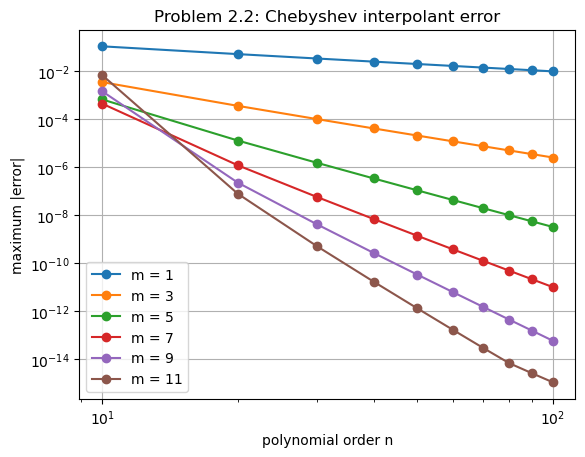

In [10]:
import numpy as np
import matplotlib.pyplot as plt

N_vals = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
m_vals = [1, 3, 5, 7, 9, 11]
err_vals = np.zeros((len(m_vals), len(N_vals)))

for ind_m, m in enumerate(m_vals):
    for ind_n, N in enumerate(N_vals):
        x_interp = np.cos(np.linspace(-np.pi, 0, N))
        x_vals = np.linspace(-1, 1, 10000)
        y_interp = abs(x_interp) ** m

        vander = [[np.cos(k * np.arccos(x_val)) for k in range(N)] for x_val in x_interp]

        # print(vander)
        beta_vals = np.linalg.solve(vander, y_interp)

        x_pred = [[np.cos(k * np.arccos(x_val)) for k in range(N)] for x_val in x_vals] @ beta_vals
        y_vals = abs(x_vals) ** m
        err_vals[ind_m, ind_n] = np.max(abs(x_pred - y_vals))

for ind_m, m in enumerate(m_vals):
    plt.loglog(N_vals, err_vals[ind_m], "o-", label="m = " + str(m))

plt.legend()
plt.grid()
plt.title("Problem 2.2: Chebyshev interpolant error")
plt.xlabel("polynomial order n")
plt.ylabel("maximum |error|")

**(2.3)** From the plot, we can see that $ \log(\text{Error}) \sim -m \log(n)$ therefore, we see empirically error is $O(n^{-m}).$

(This can be proved analytically via integration parts: as wel showed in class, the convergence rate of Chebyshev polynomial interpolation is determined by the rate of convergence of the Fourier cosine series of $f(\cos \theta)$, and integration by parts shows that this goes as $\sim n^{-m}$ where $m$ is the first derivative to have a discontinuity.)

We can check this by re-plotting the errors multiplied by $n^m$, to see that we get (approximately) constants:


Text(0, 0.5, 'maximum |error| $\\times n^m$')

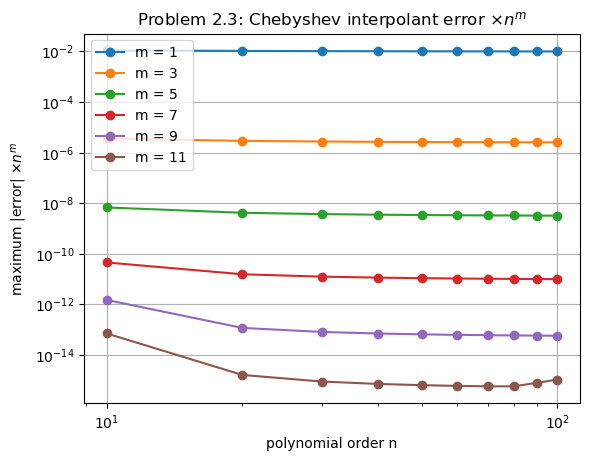

In [11]:
for ind_m, m in enumerate(m_vals):
    plt.loglog(N_vals, (np.asarray(N_vals)/100)**m * err_vals[ind_m], "o-", label="m = " + str(m))

plt.legend()
plt.grid()
plt.title("Problem 2.3: Chebyshev interpolant error $\\times n^m$")
plt.xlabel("polynomial order n")
plt.ylabel("maximum |error| $\\times n^m$")

## Problem 3 (10 points)

Kepler found that the orbital period $\tau$ of a planet depends on its mean distance $R$ from the sun according to:

$$
    \tau = c R^{\alpha}
$$

for a simple rational number $\alpha$. Perform some form of least-squares fit (or fits) to data from the following table in order to determine the most likely simple rational value of $\alpha$.  (*Hint*: what does $\log \tau$ look like in Kepler's hypothesis?)

| Planet   | Distance from Sun (Mkm) | Orbital Period (days) |
|----------|-------------------------|-----------------------|
| Mercury  | 57.59                   | 87.99                 |
| Venus    | 108.11                  | 224.7                 |
| Earth    | 149.57                  | 365.26                |
| Mars     | 227.84                  | 686.98                |
| Jupiter  | 778.14                  | 4332.4                |
| Saturn   | 1427                    | 10759                 |
| Uranus   | 2870.3                   | 30684                 |
| Neptune  | 4499.9                   | 60188                 |



## Solutions

Following the hint, $\log \tau = \log c + \alpha \log R $, so we can perform the ordinary least square on data $\log \tau$ and $\log R$ to get the unknown coefficients $\log c$ and $\alpha$. See the Julia code below. We obtained $\alpha \approx 1.5$, which is indeed the prediction of [Kepler's third law of planetary motion](https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion):

In [1]:
τ = [87.99, 224.7, 365.26, 686.98, 4332.4, 10759, 30684, 60188]
R = [57.59, 108.11, 149.57, 227.84, 778.14, 1427, 2870.3, 4499.9]
A, y = [log.(R);; ones(size(τ))], log.(τ)
α, log_c = A \ y
α

1.4986486620150805

---

## Problem 4: (5+5+5 points)

1. Let $f(x) = c^T x$ where $x$ is an $n$-component vector. What is the relative **condition number** of $f$ (depending on $x$ and $c$) in the $L_1$ norm? in the $L_2$ norm?

2. Suppose that you have two data points $(x_1, y_1)$ and $(x_2, y_2)$ and you linearly interpolate $y$ at a point $x$ ($x_1 \leq x \leq x_2$). If we think of $y(y_1, y_2)$ as a function of the input function values (keeping $x_1$ and $x_2$ fixed), show that the absolute **condition number** (in the $L_2$ norm) is bounded but the relative **condition number** can be infinite. Why does the absolute **condition number** make sense in this case?

3. If $Q$ is a square matrix with orthonormal columns (so that $Q^T Q = I$), explain why its induced norm (as defined in class) and **condition number** are both 1 (in the $L_2$ norm). Such "orthogonal" (or "unitary") matrices are the best case for solving linear systems!  (This result also generalizes to "tall" matrices with orthonormal columns.)


## Solutions

1. For input perturbation $\delta x$, $\delta f = c^T\delta x$. For the relative condition number, we want to compute $\lim_{\varepsilon \to 0^+} \sup_{\Vert \delta x\Vert  = \varepsilon}\frac{\Vert \delta f\Vert /\Vert f\Vert }{\Vert \delta x\Vert /\Vert x\Vert } = \frac{\Vert x\Vert }{\Vert c^Tx\Vert } \cdot [\lim_{\varepsilon \to 0^+} \sup_{\Vert \delta x\Vert  = \varepsilon}\frac{\Vert c^T\delta x\Vert }{\Vert \delta x\Vert }]$. 

    In the $L_1$ norm, $\Vert c^T\delta x\Vert _1=\sum |c_i\Vert \delta x_i|$, which can be viewed as weighted sum of each $|c_i|$'s. Given the total weight $\sum |\delta x_i| = \Vert \delta x\Vert _1 = \varepsilon$, the supremum occurs when all weights concentrated on the largest $|c_i|$, so the supremum is $\Vert c\Vert_{\infty}\varepsilon$. Therefore,  $\lim_{\varepsilon \to 0^+} \sup_{\Vert \delta x\Vert  = \varepsilon}\frac{\Vert c^T\delta x\Vert }{\Vert \delta x\Vert }=\lim_{\varepsilon \to 0^+} \frac{\Vert c\Vert_{\infty}\varepsilon}{\varepsilon}=\Vert c\Vert_{\infty}$. The relative condition number is thus $\frac{\Vert c\Vert_\infty\Vert x\Vert _1}{\Vert c^Tx\Vert _1}$.
    
    Similarly, in the $L_2$ norm, $\Vert c^T\delta x\Vert _2$ is the absolute value of the inner product of two vectors, whose supremum occurs when the two vectors $c$ and $\delta x$ are parallel to each other, so the supremum is $\Vert c\Vert _2\Vert \delta x\Vert _2$ = $\Vert c\Vert _2\varepsilon$. Therefore, the relative condition number is $\frac{\Vert c\Vert _2\Vert x\Vert _2}{\Vert c^Tx\Vert _2}$.
    
2. $y(y_1, y_2) = \frac{y_2-y_1}{x_2-x_1}(x-x_1)+y_1=\frac{x_2-x}{x_2-x_1} y_1+\frac{x-x_1}{x_2-x_1}y_2 = \alpha y_1 + (1-\alpha) y_2$, where we let $\alpha:=\frac{x_2-x}{x_2-x_1}$; also note that $0 \le \alpha \le 1$ since $x_1 \le x \le x_2$. The function is therefore in the same form of inner product of vectors as in the previous part.

    As a result, we know that the absolute condition number is $\sqrt{\alpha^2+(1-\alpha)^2}$, which is upper bounded by 1 and lower bounded by $\frac1{\sqrt{2}}$ for $0 \le \alpha \le 1$. However, the relative condtion number can be infinite when the vectors $(\alpha, 1-\alpha)$ and $(y_1, y_2)$ are perpendicular and the function value itself becomes 0.
    
    The absolute condition number makes sense here because the "units" of the inputs and outputs are the same (hence the absolute condition number is dimensionless): the inputs are $y$ values, and the outputs are $y$ values.

3. For orthogonal matrix Q, $\Vert Qx\Vert _2^2 = x^TQ^TQx=x^Tx=\Vert x\Vert _2^2$, so $\Vert Qx\Vert _2=\Vert x\Vert _2$. The induced norm $\Vert Q\Vert _2 = \sup \frac{\Vert Qx\Vert _2}{\Vert x\Vert _2}= 1$. The transpose (= inverse) of an orthogonal matrix is also orthogonal, so the condition number is $\Vert Q\Vert _2\Vert Q^{-1}\Vert _2=\Vert Q\Vert _2\Vert Q^T\Vert _2=1$
    